#🏠 House Price Data Analysis and Regression Modeling
###✅ Step 1: Install kagglehub


In [3]:
!pip install kagglehub

###✅ Step 2: Download the Dataset

In [4]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housesalesprediction


###✅ Step 3: Load CSV into pandas

In [5]:
import pandas as pd
import os

csv_path = os.path.join(path, "kc_house_data.csv")
df = pd.read_csv(csv_path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###✅ Step 4: Display the Data Types of Each Column

In [6]:
df.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

###✅ Step 5: Drop Columns and Show Statistical Summary

In [9]:
df.drop(["id"], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


###✅ Step 6: Count Unique Floor Values

In [10]:
floor_counts = df["floors"].value_counts().to_frame()
floor_counts

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


###✅ Step 7: Boxplot of Price by Waterfront View

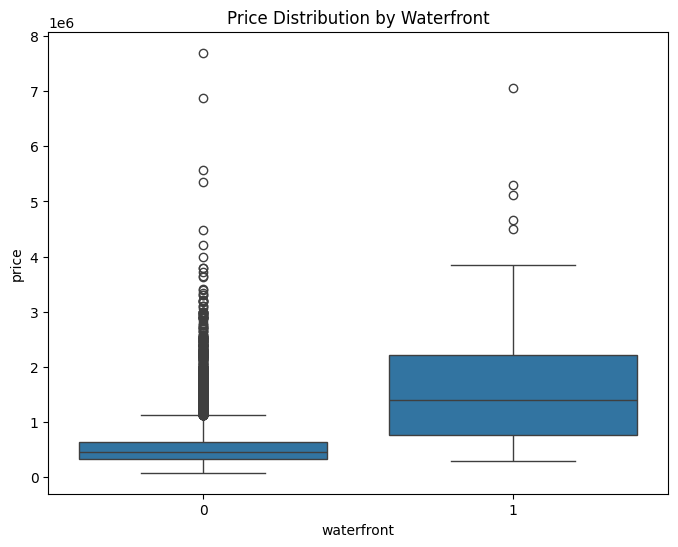

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x="waterfront", y="price", data=df)
plt.title("Price Distribution by Waterfront")
plt.show()

###✅ Step 8: Regression Plot of sqft_above vs Price

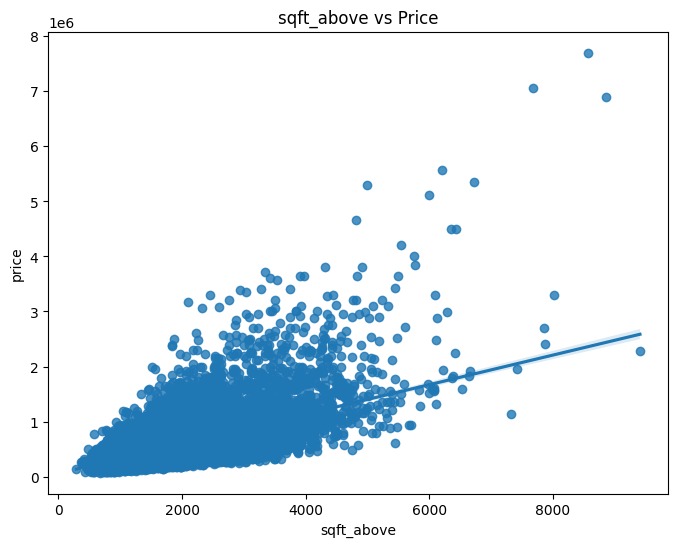

In [12]:
plt.figure(figsize=(8,6))
sns.regplot(x="sqft_above", y="price", data=df)
plt.title("sqft_above vs Price")
plt.show()

###✅ Step 9: Linear Regression with sqft_living

In [13]:
from sklearn.linear_model import LinearRegression

X = df[["sqft_living"]]
y = df["price"]

lm = LinearRegression()
lm.fit(X, y)

R2_simple = lm.score(X, y)
print("R^2:", R2_simple)


R^2: 0.4928532179037931


###✅ Step 10: Multiple Linear Regression with Several Features

In [14]:
features = [
    "floors",
    "waterfront",
    "lat",
    "bedrooms",
    "sqft_basement",
    "view",
    "bathrooms",
    "sqft_living15",
    "sqft_above",
    "grade",
    "sqft_living"
]

X_multi = df[features]
y = df["price"]

lm_multi = LinearRegression()
lm_multi.fit(X_multi, y)

R2_multi = lm_multi.score(X_multi, y)
print("R^2:", R2_multi)


R^2: 0.6577151058279325


###✅ Step 11: Pipeline (Scaling + Polynomial Features + Linear Regression)

In [15]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

pipe.fit(X_multi, y)

R2_pipe = pipe.score(X_multi, y)
print("R^2:", R2_pipe)


R^2: 0.7513467656307783


###✅ Step 12: Ridge Regression with Train/Test Split

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=1)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

R2_ridge = ridge.score(X_test, y_test)
print("R^2:", R2_ridge)


R^2: 0.6460194468601674


###✅ Step 13: Polynomial Features + Ridge Regression

In [17]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)

R2_ridge_poly = ridge_poly.score(X_test_poly, y_test)
print("R^2:", R2_ridge_poly)


R^2: 0.7546208822192072
